<a href="https://colab.research.google.com/github/BANZOM/MachingLearningStuffs/blob/main/RES_NET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dataset so to give input to model**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

# Adi Ref: /content/drive/MyDrive/ColabNotebooks/BTdsYesNo/



img_dir = '/content/drive/MyDrive/ColabNotebooks/BTdsYesNo/'

dataset_path = os.listdir(img_dir)

dataset_category = os.listdir(img_dir)
print (dataset_category)  #what kinds of data are in this dataset

print("Types of data found: ", len(dataset_path))



['no', 'yes']
Types of data found:  2


**Building the dataframe**

In [23]:
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [24]:
dataset = []

for item in dataset_category:
    # Get all the file names
    all_data = os.listdir(img_dir + '/' +item)

    print(all_data)

 # Add them to the list
    for images in all_data:
        dataset.append((item, str(img_dir+ '/' +item) + '/' + images))
        # print(dataset)

['no266.jpg', 'no1410.jpg', 'no175.jpg', 'no150.jpg', 'no183.jpg', 'no234.jpg', 'no1164.jpg', 'no1135.jpg', 'no1286.jpg', 'no1194.jpg', 'no1482.jpg', 'no1281.jpg', 'no163.jpg', 'no1070.jpg', 'no254.jpg', 'no200.jpg', 'no1146.jpg', 'no1476.jpg', 'no258.jpg', 'no279.jpg', 'no1169.jpg', 'no1371.jpg', 'no290.jpg', 'no1076.jpg', 'no1098.jpg', 'no1435.jpg', 'no185.jpg', 'no1148.jpg', 'no1347.jpg', 'no1094.jpg', 'no1448.jpg', 'no1343.jpg', 'no1302.jpg', 'no1060.jpg', 'no239.jpg', 'no1145.jpg', 'no1425.jpg', 'no1244.jpg', 'no261.jpg', 'no176.jpg', 'no262.jpg', 'no1295.jpg', 'no214.jpg', 'no1312.jpg', 'no1325.jpg', 'no235.jpg', 'no1428.jpg', 'no1427.jpg', 'no1134.jpg', 'no124.jpg', 'no270.jpg', 'no1252.jpg', 'no1354.jpg', 'no1061.jpg', 'no1493.jpg', 'no252.jpg', 'no1219.jpg', 'no1215.jpg', 'no1268.jpg', 'no1332.jpg', 'no1497.jpg', 'no296.jpg', 'no260.jpg', 'no1082.jpg', 'no1112.jpg', 'no133.jpg', 'no1123.jpg', 'no1170.jpg', 'no1230.jpg', 'no1132.jpg', 'no146.jpg', 'no1227.jpg', 'no1452.jpg', 'n

In [25]:
# Build a dataframe        

tumor_df = pd.DataFrame(data=dataset, columns=['Tumor', 'image'])
print(tumor_df.head())
print(tumor_df.tail())

  Tumor                                              image
0    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
1    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
3    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
4    no  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
     Tumor                                              image
2995   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2996   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2997   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2998   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...
2999   yes  /content/drive/MyDrive/ColabNotebooks/BTdsYesN...


In [26]:
# Let's check how many samples for each category are present
print("Total number of images are there in the dataset: ", len(tumor_df))

images_count = tumor_df['Tumor'].value_counts()

print("Images in each category: ")
print(images_count)

Total number of images are there in the dataset:  3000
Images in each category: 
no     1500
yes    1500
Name: Tumor, dtype: int64


**Data Processing**

In [27]:
import cv2
from PIL import Image



In [28]:
no_tumor = os.listdir(img_dir + '/no')

#check if it did it perfectly
print(no_tumor)

['no266.jpg', 'no1410.jpg', 'no175.jpg', 'no150.jpg', 'no183.jpg', 'no234.jpg', 'no1164.jpg', 'no1135.jpg', 'no1286.jpg', 'no1194.jpg', 'no1482.jpg', 'no1281.jpg', 'no163.jpg', 'no1070.jpg', 'no254.jpg', 'no200.jpg', 'no1146.jpg', 'no1476.jpg', 'no258.jpg', 'no279.jpg', 'no1169.jpg', 'no1371.jpg', 'no290.jpg', 'no1076.jpg', 'no1098.jpg', 'no1435.jpg', 'no185.jpg', 'no1148.jpg', 'no1347.jpg', 'no1094.jpg', 'no1448.jpg', 'no1343.jpg', 'no1302.jpg', 'no1060.jpg', 'no239.jpg', 'no1145.jpg', 'no1425.jpg', 'no1244.jpg', 'no261.jpg', 'no176.jpg', 'no262.jpg', 'no1295.jpg', 'no214.jpg', 'no1312.jpg', 'no1325.jpg', 'no235.jpg', 'no1428.jpg', 'no1427.jpg', 'no1134.jpg', 'no124.jpg', 'no270.jpg', 'no1252.jpg', 'no1354.jpg', 'no1061.jpg', 'no1493.jpg', 'no252.jpg', 'no1219.jpg', 'no1215.jpg', 'no1268.jpg', 'no1332.jpg', 'no1497.jpg', 'no296.jpg', 'no260.jpg', 'no1082.jpg', 'no1112.jpg', 'no133.jpg', 'no1123.jpg', 'no1170.jpg', 'no1230.jpg', 'no1132.jpg', 'no146.jpg', 'no1227.jpg', 'no1452.jpg', 'n

In [29]:
im_size = 64

dataset = []
label = []

# for i in tumor_df:
#     data_path = img_dir + str(i)  
#     filenames = [i for i in os.listdir(data_path) ]
   
#     for f in filenames:
#         img = cv2.imread(data_path + '/' + f)
#         img = cv2.resize(img, (im_size, im_size))
#         dataset.append(img)
#         label.append(i)


In [ ]:
# check it its a jpg bcz we only needed jpg img only

for i , img_all in enumerate(no_tumor):
    if( img_all.split('.')[1] == 'jpg' ):
        image = cv2.imread( img_dir + 'no/' + img_all)  # selection of only .jpg format
        image = Image.fromarray( image, 'RGB')
        image = image.resize( (im_size,im_size) ) # resizing image 
        dataset.append( np.array(image))
        label.append(0)

In [ ]:
# doing the same for tumor = yes images
yes_tumor = os.listdir(img_dir + 'yes')
for i , img_all in enumerate(yes_tumor):
    if( img_all.split('.')[1] == 'jpg' ):
        image = cv2.imread( img_dir + 'yes/' + img_all)  # selection of only .jpg format
        image = Image.fromarray( image, 'RGB')
        image = image.resize( (im_size,im_size) ) # resizing image 
        dataset.append( np.array(image))
        label.append(1)

In [ ]:
print(len(label))
len(dataset)

In [33]:
dataset = np.array(dataset)

dataset = dataset.astype('float32') / 255.0
dataset.shape 

(3000, 64, 64, 3)

In [34]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer


y=tumor_df['Tumor'].values
#print(y[:5])

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
y = y.reshape(-1,1)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])],remainder='passthrough')
Y=np.array(columnTransformer.fit_transform(y)) #dtype=np.str
Y.shape

(3000, 2)

In [36]:
# y=y.reshape(-1,1)
# onehotencoder = OneHotEncoder(categorical_features=[0])  #Converted  scalar output into vector output where the correct class will be 1 and other will be 0
# Y= onehotencoder.fit_transform(y)
# Y.shape  #(40, 2)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


images, Y = shuffle(dataset, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=0)

In [38]:
# from sklearn.model_selection import train_test_split
# label = np.array(label)

# x_train , x_test , y_train , y_test = train_test_split( dataset , label, test_size=0.2 , random_state=0)

In [39]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2400, 64, 64, 3)
(2400, 2)
(600, 64, 64, 3)
(600, 2)


# RES NET


In [40]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow

from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

In [41]:

def identity_block(X, f, filters, stage, block):
    """
   
    Arguments:
    X -- input of shape (m, height, width, channel)
    f -- shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Saving the input value.we need this later to add to the output. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [42]:
def convolutional_block(X, f, filters, stage, block, s = 2):
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)  # normalization on channels
    X = Activation('relu')(X)

      
    # Second layer  (f,f)=3*3 filter by default
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [43]:
#Each ResNet block is either 2 layer deep
def ResNet50(input_shape=(64, 64, 3), classes=2):
    """
    Implementation of the ResNet50 architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X) #64 filters of 7*7 
    X = BatchNormalization(axis=3, name='bn_conv1')(X) #batchnorm applied on channels
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) #window size is 3*3

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    # convolutional_block is a function defined above. Convolutional_block have 3 layers.
    #filters=[64, 64, 256] first 64 is for 1st layer and 2nd 64 is for 2nd layer and 256 is for 3rd layer of convultional block   
    # below are the conv layers from convolutional_block function
    #X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
    #X = Conv2D(F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(F3, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X)
   
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b') 
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    #X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    #X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    #X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)


    ### START CODE HERE ###

    # Stage 3 
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4 
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL 
    X = AveragePooling2D((2,2), name="avg_pool")(X)
     ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [44]:
model = ResNet50(input_shape = (64,64,3), classes = 2)

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 32, 32, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1[0][0]']                  
                                                                                           

In [47]:
model.fit(train_x, train_y, epochs = 6, batch_size = 16)

Epoch 1/6
150/150 [==============================] - 19s 39ms/step - loss: 0.7993 - accuracy: 0.7729
Epoch 2/6
150/150 [==============================] - 6s 39ms/step - loss: 0.3723 - accuracy: 0.8758
Epoch 3/6
150/150 [==============================] - 6s 39ms/step - loss: 0.1732 - accuracy: 0.9429
Epoch 4/6
150/150 [==============================] - 6s 39ms/step - loss: 0.2198 - accuracy: 0.9237
Epoch 5/6
150/150 [==============================] - 6s 39ms/step - loss: 0.1053 - accuracy: 0.9613
Epoch 6/6
150/150 [==============================] - 6s 39ms/step - loss: 0.0638 - accuracy: 0.9779


In [48]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

19/19 [==============================] - 2s 36ms/step - loss: 0.1392 - accuracy: 0.9533
Loss = 0.13924814760684967
Test Accuracy = 0.95333331823349


Input image shape: (1, 64, 64, 3)
1/1 [==============================] - 0s 32ms/step
[[0. 1.]]


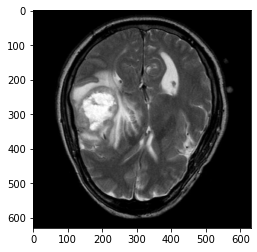

In [53]:
from matplotlib.pyplot import imread
# from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
import tensorflow as tf

# Aditya Ref: /content/drive/MyDrive/ColabNotebooks/PRED/0CRAQZGP.jpg

img_path = '/content/drive/MyDrive/ColabNotebooks/BTdsYesNo/yes/y100.jpg'
img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))